In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
dataset=pd.read_csv(r'G:\machinelearning\Salary_dataset.csv')

In [5]:
dataset.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [7]:
dataset.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [9]:
dataset.size
dataset.shape

(30, 3)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [11]:
dataset.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


C:\Users\home\AppData\Local\Temp\ipykernel_10392\1551759928.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_by_exp = dataset.groupby('exp')['Salary'].sum().reset_index()


<Axes: xlabel='exp', ylabel='Salary'>

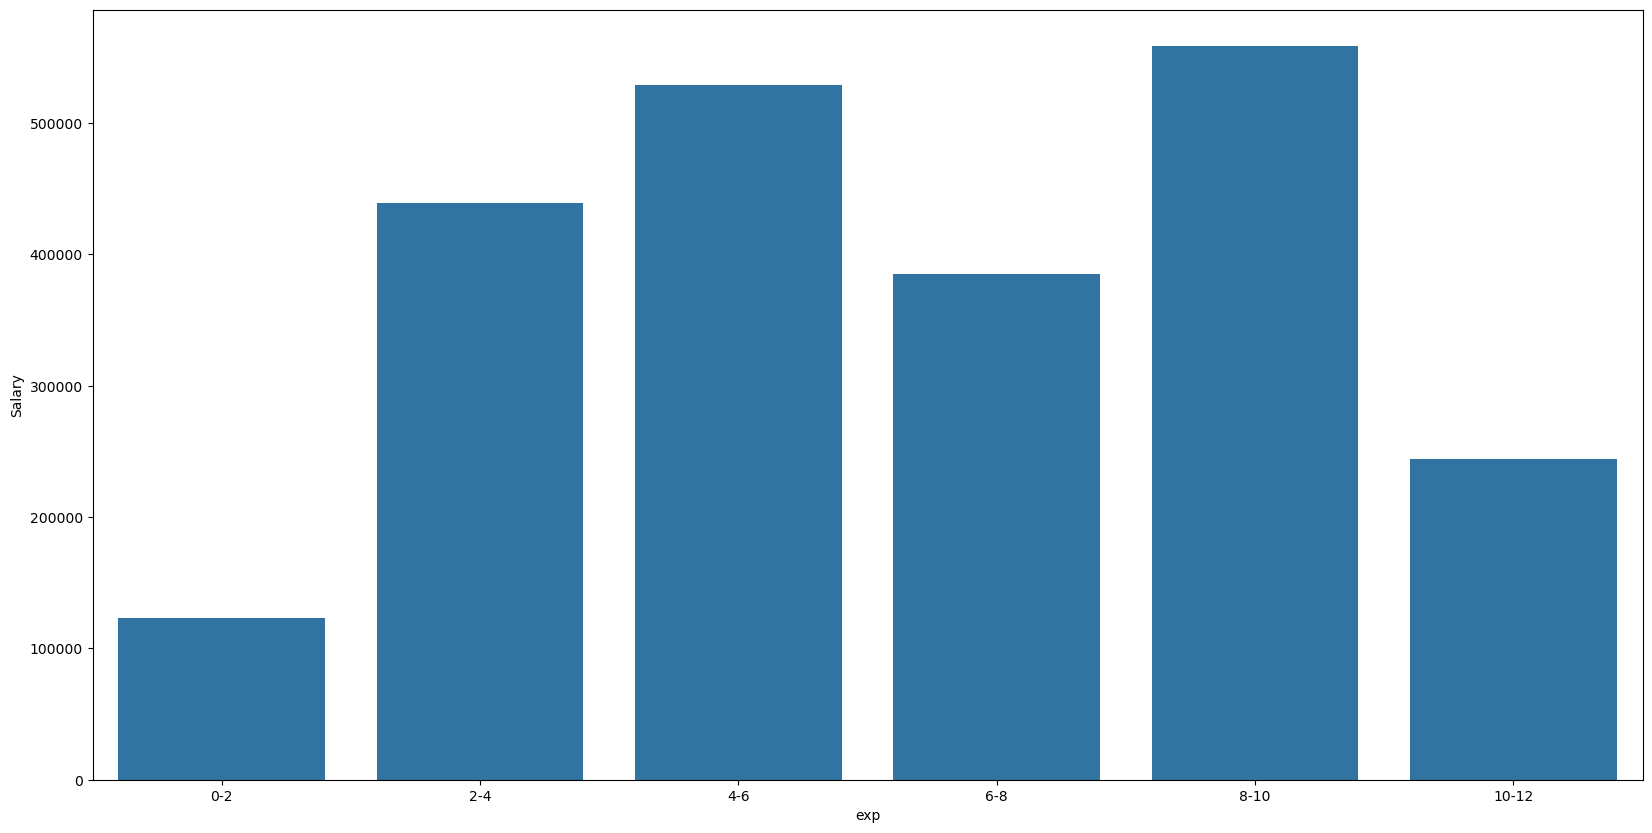

In [20]:
plt.figure(figsize=(20,10))
plt.subplot(1,1,1)
exp_bin=[0,2,4,6,8,10,12]
exp_lables=['0-2','2-4','4-6','6-8','8-10','10-12']
dataset['exp']=pd.cut(dataset['YearsExperience'],bins=exp_bin,labels=exp_lables)
#sum of salary by exp bin
salary_by_exp = dataset.groupby('exp')['Salary'].sum().reset_index()
sns.barplot(x='exp', y='Salary', data=salary_by_exp)


In [21]:
num_col=['YearsExperience'	,'Salary']
corr_matrix=dataset[num_col].corr()

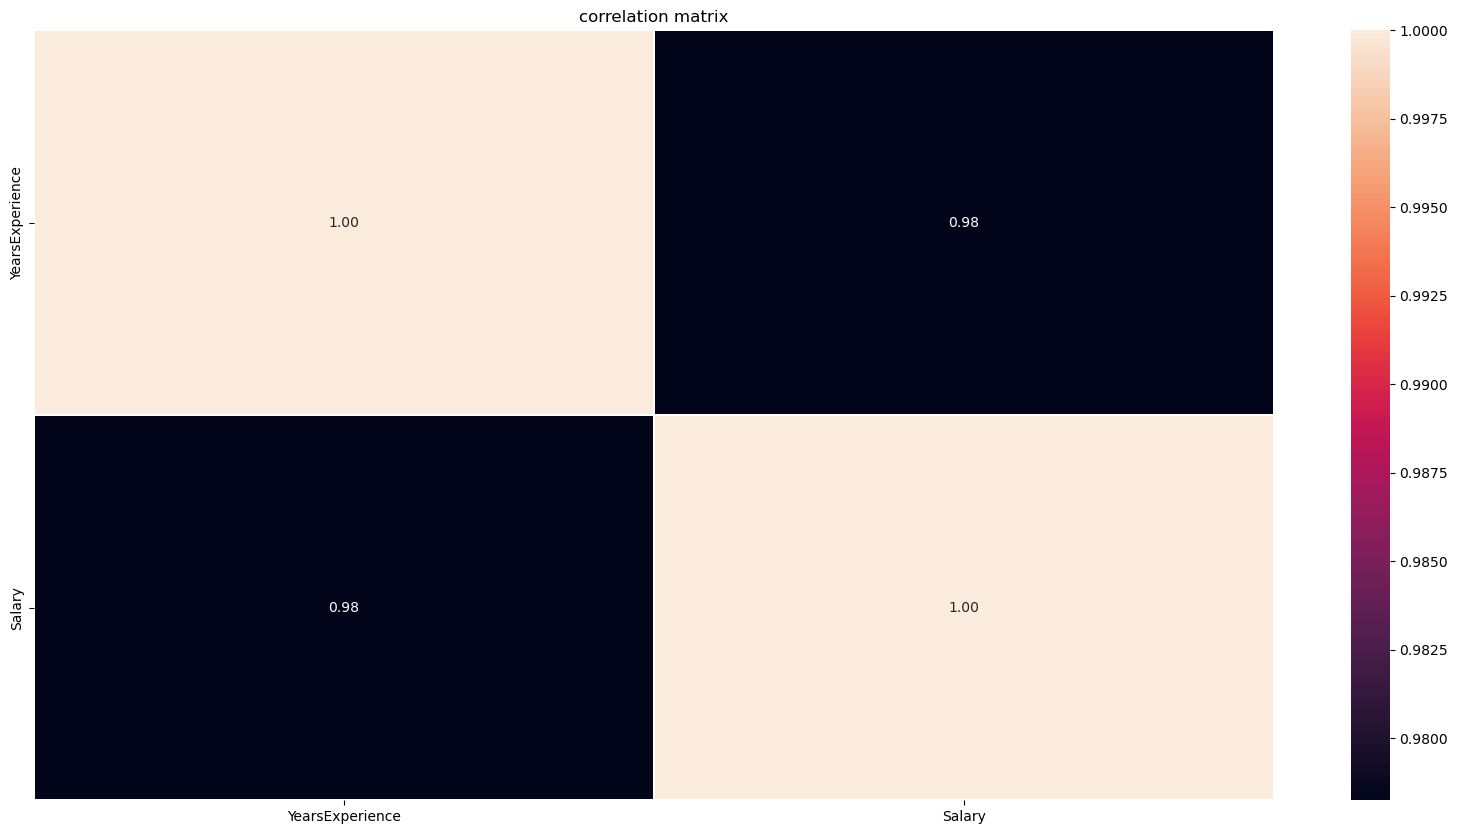

In [23]:
#heatmap
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix,annot=True,fmt='.2f',linewidth=0.2)
plt.title('correlation matrix')
plt.show()

In [31]:
#train and test
x=dataset[['YearsExperience']]
y=dataset['Salary']

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (24, 1)
x test:  (6, 1)
y train:  (24,)
y test:  (6,)


In [33]:
# Initialize the model
model = LinearRegression()

# Train 
model.fit(x_train, y_train)

# Predict on the test data
y_pred = model.predict(x_test)

In [34]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [9268.66191159]
Intercept: 26605.274108228798


In [35]:
#mean square error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print('mean squared error:',mse)

mean squared error: 61641413.30887985


In [37]:
error=y_test-y_pred
print(error)

2     -3703.133167
16    -8772.316048
19    10796.888231
14    -8129.118902
15    -5009.583666
13    -8451.654137
Name: Salary, dtype: float64


<Axes: ylabel='Salary'>

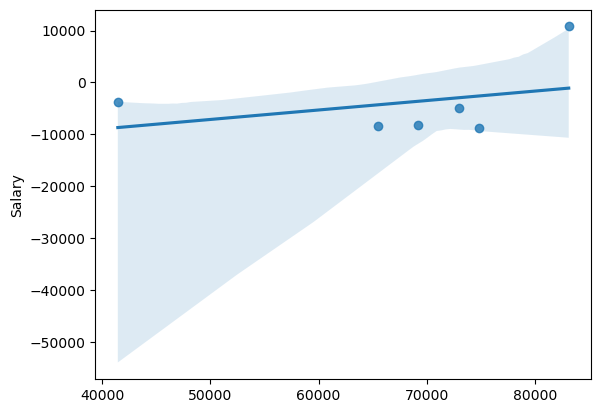

In [38]:
sns.regplot(x=y_pred,y=error,data=dataset)